<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/6_BatchNormalization_Regularization/MNIST_Normalization_and_Regularization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/regularization'
%cd $BASE_DIR
from utils import train, test, model,plot_metrics,helper,data_loader 
import torch

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt


!pip install torchsummary

/content/drive/MyDrive/regularization


## Set the seed for reproducibility

In [ ]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

cuda = torch.cuda.is_available()
if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")


## Download data

In [ ]:
train_transforms, test_transforms = data_loader.data_augmentation()
train,test = data_loader.download_mnist_data(train_transforms, test_transforms)

## Dataloader

In [ ]:
BATCH_SIZE_GPU = 128
BATCH_SIZE_CPU = 64

dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE_GPU, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=BATCH_SIZE_CPU)
train_loader, test_loader = data_loader.dataloader(train, test,dataloader_args)

## Variable Initialization

In [ ]:
exp_metrics={}
EPOCH=20
dropout=0.03

## Exp1 : LayerNorm with no regularization

In [ ]:
experiment_name='LayerNorm'
norm_type='LN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,'LN',l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.31078654527664185 Batch_id=468 Accuracy=65.20: 100%|██████████| 469/469 [00:32<00:00, 14.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2331, Accuracy: 9580/10000 (95.80%)

Epoch 2:


Loss=0.1597178727388382 Batch_id=468 Accuracy=93.58: 100%|██████████| 469/469 [00:32<00:00, 14.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0722, Accuracy: 9822/10000 (98.22%)

Epoch 3:


Loss=0.14977118372917175 Batch_id=468 Accuracy=95.45: 100%|██████████| 469/469 [00:33<00:00, 14.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0512, Accuracy: 9861/10000 (98.61%)

Epoch 4:


Loss=0.1564299464225769 Batch_id=468 Accuracy=96.63: 100%|██████████| 469/469 [00:33<00:00, 14.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9851/10000 (98.51%)

Epoch 5:


Loss=0.1298498660326004 Batch_id=468 Accuracy=97.16: 100%|██████████| 469/469 [00:33<00:00, 14.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0406, Accuracy: 9869/10000 (98.69%)

Epoch 6:


Loss=0.11593229323625565 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:33<00:00, 14.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 9880/10000 (98.80%)

Epoch 7:


Loss=0.12527693808078766 Batch_id=468 Accuracy=97.62: 100%|██████████| 469/469 [00:33<00:00, 14.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0379, Accuracy: 9880/10000 (98.80%)

Epoch 8:


Loss=0.07192536443471909 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:33<00:00, 13.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9903/10000 (99.03%)

Epoch 9:


Loss=0.08263050764799118 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9907/10000 (99.07%)

Epoch 10:


Loss=0.08201522380113602 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:33<00:00, 13.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9924/10000 (99.24%)

Epoch 11:


Loss=0.07945630699396133 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:33<00:00, 13.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9919/10000 (99.19%)

Epoch 12:


Loss=0.07153027504682541 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:33<00:00, 14.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Epoch 13:


Loss=0.028193609789013863 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:33<00:00, 13.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9914/10000 (99.14%)

Epoch 14:


Loss=0.03217054903507233 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:33<00:00, 14.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9927/10000 (99.27%)

Epoch 15:


Loss=0.023898275569081306 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:33<00:00, 13.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9929/10000 (99.29%)

Epoch 16:


Loss=0.019489483907818794 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:35<00:00, 13.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9931/10000 (99.31%)

Epoch 17:


Loss=0.09027668833732605 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:34<00:00, 13.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9929/10000 (99.29%)

Epoch 18:


Loss=0.00879295077174902 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:33<00:00, 13.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9933/10000 (99.33%)

Epoch 19:


Loss=0.0024384446442127228 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:33<00:00, 13.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9932/10000 (99.32%)

Epoch 20:


Loss=0.07282852381467819 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:34<00:00, 13.78it/s]



Test set: Average loss: 0.0199, Accuracy: 9936/10000 (99.36%)



## Missclassified Images for Exp1

Total wrong predictions are 64


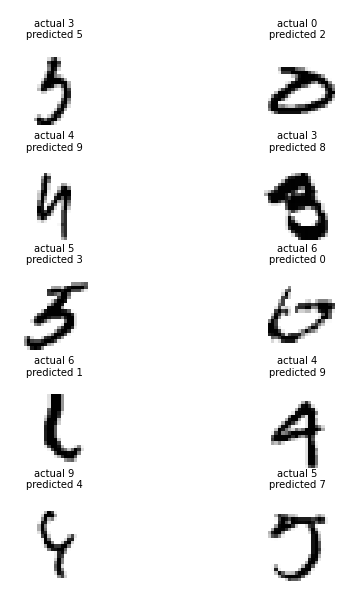

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp2 : GroupNorm with no regularization

In [ ]:
experiment_name='GroupNorm'
norm_type='GN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.8842025399208069 Batch_id=468 Accuracy=45.30: 100%|██████████| 469/469 [00:33<00:00, 13.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7395, Accuracy: 8170/10000 (81.70%)

Epoch 2:


Loss=0.2628614008426666 Batch_id=468 Accuracy=86.58: 100%|██████████| 469/469 [00:33<00:00, 13.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0963, Accuracy: 9795/10000 (97.95%)

Epoch 3:


Loss=0.10854790359735489 Batch_id=468 Accuracy=94.56: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0695, Accuracy: 9811/10000 (98.11%)

Epoch 4:


Loss=0.20009982585906982 Batch_id=468 Accuracy=96.08: 100%|██████████| 469/469 [00:33<00:00, 14.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0565, Accuracy: 9836/10000 (98.36%)

Epoch 5:


Loss=0.07356500625610352 Batch_id=468 Accuracy=96.63: 100%|██████████| 469/469 [00:33<00:00, 13.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0418, Accuracy: 9872/10000 (98.72%)

Epoch 6:


Loss=0.10407143086194992 Batch_id=468 Accuracy=96.75: 100%|██████████| 469/469 [00:33<00:00, 14.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9880/10000 (98.80%)

Epoch 7:


Loss=0.15819062292575836 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:33<00:00, 13.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0406, Accuracy: 9880/10000 (98.80%)

Epoch 8:


Loss=0.07512063533067703 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:33<00:00, 13.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9914/10000 (99.14%)

Epoch 9:


Loss=0.018448933959007263 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:33<00:00, 13.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9918/10000 (99.18%)

Epoch 10:


Loss=0.08110116422176361 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:33<00:00, 13.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9909/10000 (99.09%)

Epoch 11:


Loss=0.15529516339302063 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:33<00:00, 13.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9927/10000 (99.27%)

Epoch 12:


Loss=0.0299016535282135 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:33<00:00, 13.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9929/10000 (99.29%)

Epoch 13:


Loss=0.009057838469743729 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:33<00:00, 13.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9930/10000 (99.30%)

Epoch 14:


Loss=0.17929278314113617 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:33<00:00, 14.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9937/10000 (99.37%)

Epoch 15:


Loss=0.09736528992652893 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9935/10000 (99.35%)

Epoch 16:


Loss=0.06308998912572861 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:33<00:00, 13.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9939/10000 (99.39%)

Epoch 17:


Loss=0.05381995067000389 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:33<00:00, 13.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9943/10000 (99.43%)

Epoch 18:


Loss=0.07783389836549759 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:33<00:00, 14.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9949/10000 (99.49%)

Epoch 19:


Loss=0.0408918522298336 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:33<00:00, 13.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9947/10000 (99.47%)

Epoch 20:


Loss=0.014973354525864124 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:33<00:00, 13.97it/s]



Test set: Average loss: 0.0183, Accuracy: 9947/10000 (99.47%)



## Model Summary

In [ ]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp2

Total wrong predictions are 53


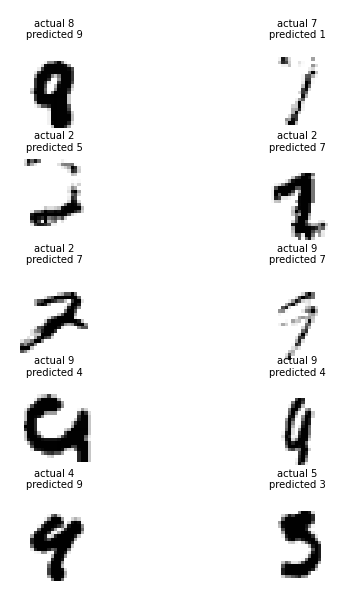

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp3 : BatchNorm with L1 regularization

In [ ]:
experiment_name='BatchNorm+L1'
norm_type='BN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.8589162230491638 Batch_id=468 Accuracy=68.88: 100%|██████████| 469/469 [00:34<00:00, 13.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1895, Accuracy: 9668/10000 (96.68%)

Epoch 2:


Loss=0.5707521438598633 Batch_id=468 Accuracy=93.89: 100%|██████████| 469/469 [00:34<00:00, 13.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0760, Accuracy: 9795/10000 (97.95%)

Epoch 3:


Loss=0.46190375089645386 Batch_id=468 Accuracy=95.55: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0542, Accuracy: 9843/10000 (98.43%)

Epoch 4:


Loss=0.48735612630844116 Batch_id=468 Accuracy=95.86: 100%|██████████| 469/469 [00:34<00:00, 13.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0770, Accuracy: 9771/10000 (97.71%)

Epoch 5:


Loss=0.4418116807937622 Batch_id=468 Accuracy=96.02: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0651, Accuracy: 9798/10000 (97.98%)

Epoch 6:


Loss=0.565300464630127 Batch_id=468 Accuracy=96.05: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0473, Accuracy: 9855/10000 (98.55%)

Epoch 7:


Loss=0.33160340785980225 Batch_id=468 Accuracy=96.17: 100%|██████████| 469/469 [00:34<00:00, 13.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0429, Accuracy: 9859/10000 (98.59%)

Epoch 8:


Loss=0.43229570984840393 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:34<00:00, 13.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9857/10000 (98.57%)

Epoch 9:


Loss=0.5026772022247314 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:34<00:00, 13.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0431, Accuracy: 9858/10000 (98.58%)

Epoch 10:


Loss=0.37091508507728577 Batch_id=468 Accuracy=96.44: 100%|██████████| 469/469 [00:35<00:00, 13.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9841/10000 (98.41%)

Epoch 11:


Loss=0.5001360177993774 Batch_id=468 Accuracy=96.43: 100%|██████████| 469/469 [00:35<00:00, 13.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0477, Accuracy: 9845/10000 (98.45%)

Epoch 12:


Loss=0.3114931881427765 Batch_id=468 Accuracy=96.62: 100%|██████████| 469/469 [00:34<00:00, 13.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0545, Accuracy: 9839/10000 (98.39%)

Epoch 13:


Loss=0.3550036549568176 Batch_id=468 Accuracy=96.89: 100%|██████████| 469/469 [00:34<00:00, 13.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0901, Accuracy: 9729/10000 (97.29%)

Epoch 14:


Loss=0.304641455411911 Batch_id=468 Accuracy=96.83: 100%|██████████| 469/469 [00:34<00:00, 13.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0370, Accuracy: 9889/10000 (98.89%)

Epoch 15:


Loss=0.48217514157295227 Batch_id=468 Accuracy=96.98: 100%|██████████| 469/469 [00:34<00:00, 13.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 9888/10000 (98.88%)

Epoch 16:


Loss=0.2745397984981537 Batch_id=468 Accuracy=97.19: 100%|██████████| 469/469 [00:34<00:00, 13.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9899/10000 (98.99%)

Epoch 17:


Loss=0.27470704913139343 Batch_id=468 Accuracy=97.55: 100%|██████████| 469/469 [00:34<00:00, 13.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9920/10000 (99.20%)

Epoch 18:


Loss=0.22932210564613342 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:34<00:00, 13.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.11%)

Epoch 19:


Loss=0.24960973858833313 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:34<00:00, 13.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9931/10000 (99.31%)

Epoch 20:


Loss=0.19837923347949982 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:34<00:00, 13.69it/s]



Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)



## Model Summary

In [ ]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp3

Total wrong predictions are 68


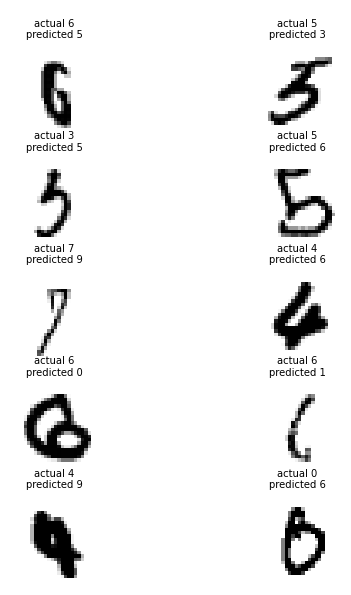

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp4 : GroupNorm with L1 regularization

In [ ]:
experiment_name='GroupNorm+L1'
norm_type='GN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=1.2248599529266357 Batch_id=468 Accuracy=58.52: 100%|██████████| 469/469 [00:33<00:00, 13.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4364, Accuracy: 9282/10000 (92.82%)

Epoch 2:


Loss=0.7488390207290649 Batch_id=468 Accuracy=89.58: 100%|██████████| 469/469 [00:33<00:00, 13.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1063, Accuracy: 9775/10000 (97.75%)

Epoch 3:


Loss=0.6161739826202393 Batch_id=468 Accuracy=94.05: 100%|██████████| 469/469 [00:33<00:00, 13.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0793, Accuracy: 9805/10000 (98.05%)

Epoch 4:


Loss=0.6138823628425598 Batch_id=468 Accuracy=95.33: 100%|██████████| 469/469 [00:33<00:00, 13.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0811, Accuracy: 9794/10000 (97.94%)

Epoch 5:


Loss=0.45909324288368225 Batch_id=468 Accuracy=95.44: 100%|██████████| 469/469 [00:33<00:00, 13.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0640, Accuracy: 9826/10000 (98.26%)

Epoch 6:


Loss=0.5586963295936584 Batch_id=468 Accuracy=95.66: 100%|██████████| 469/469 [00:35<00:00, 13.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0703, Accuracy: 9807/10000 (98.07%)

Epoch 7:


Loss=0.5507089495658875 Batch_id=468 Accuracy=95.86: 100%|██████████| 469/469 [00:34<00:00, 13.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0860, Accuracy: 9782/10000 (97.82%)

Epoch 8:


Loss=0.42978671193122864 Batch_id=468 Accuracy=95.92: 100%|██████████| 469/469 [00:34<00:00, 13.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0525, Accuracy: 9860/10000 (98.60%)

Epoch 9:


Loss=0.5253953337669373 Batch_id=468 Accuracy=96.19: 100%|██████████| 469/469 [00:34<00:00, 13.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1024, Accuracy: 9702/10000 (97.02%)

Epoch 10:


Loss=0.5017886757850647 Batch_id=468 Accuracy=96.10: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0754, Accuracy: 9797/10000 (97.97%)

Epoch 11:


Loss=0.4263213276863098 Batch_id=468 Accuracy=96.16: 100%|██████████| 469/469 [00:34<00:00, 13.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0578, Accuracy: 9844/10000 (98.44%)

Epoch 12:


Loss=0.3799244165420532 Batch_id=468 Accuracy=96.35: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0528, Accuracy: 9857/10000 (98.57%)

Epoch 13:


Loss=0.3611255884170532 Batch_id=468 Accuracy=96.55: 100%|██████████| 469/469 [00:33<00:00, 13.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0446, Accuracy: 9878/10000 (98.78%)

Epoch 14:


Loss=0.3196108639240265 Batch_id=468 Accuracy=96.62: 100%|██████████| 469/469 [00:34<00:00, 13.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0728, Accuracy: 9793/10000 (97.93%)

Epoch 15:


Loss=0.3552711009979248 Batch_id=468 Accuracy=96.84: 100%|██████████| 469/469 [00:34<00:00, 13.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0412, Accuracy: 9892/10000 (98.92%)

Epoch 16:


Loss=0.35004666447639465 Batch_id=468 Accuracy=97.02: 100%|██████████| 469/469 [00:34<00:00, 13.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0421, Accuracy: 9889/10000 (98.89%)

Epoch 17:


Loss=0.29207924008369446 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:34<00:00, 13.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9904/10000 (99.04%)

Epoch 18:


Loss=0.35585951805114746 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:36<00:00, 12.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9925/10000 (99.25%)

Epoch 19:


Loss=0.2668043076992035 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:35<00:00, 13.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9931/10000 (99.31%)

Epoch 20:


Loss=0.2516961097717285 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:35<00:00, 13.31it/s]



Test set: Average loss: 0.0276, Accuracy: 9927/10000 (99.27%)



## Model Summary

In [ ]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp4

Total wrong predictions are 73


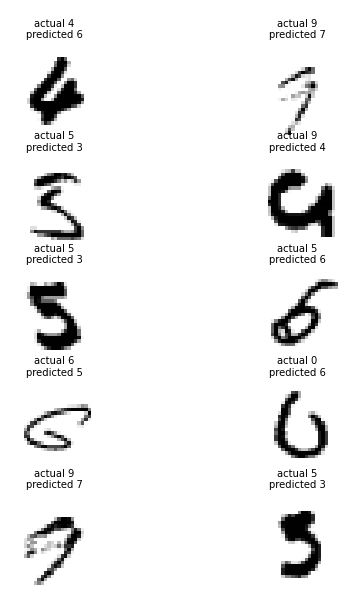

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp5 : LayerNorm with L2 regularization

In [ ]:
experiment_name='LayerNorm+L2'
norm_type='LN'
l1_factor=0
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.3484535217285156 Batch_id=468 Accuracy=64.09: 100%|██████████| 469/469 [00:33<00:00, 13.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2628, Accuracy: 9544/10000 (95.44%)

Epoch 2:


Loss=0.10703709721565247 Batch_id=468 Accuracy=92.52: 100%|██████████| 469/469 [00:33<00:00, 13.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0815, Accuracy: 9804/10000 (98.04%)

Epoch 3:


Loss=0.09767770767211914 Batch_id=468 Accuracy=95.77: 100%|██████████| 469/469 [00:33<00:00, 13.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0510, Accuracy: 9854/10000 (98.54%)

Epoch 4:


Loss=0.02198629267513752 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:33<00:00, 13.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9864/10000 (98.64%)

Epoch 5:


Loss=0.06290634721517563 Batch_id=468 Accuracy=97.15: 100%|██████████| 469/469 [00:33<00:00, 13.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0410, Accuracy: 9876/10000 (98.76%)

Epoch 6:


Loss=0.019181448966264725 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:33<00:00, 14.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0395, Accuracy: 9872/10000 (98.72%)

Epoch 7:


Loss=0.08724823594093323 Batch_id=468 Accuracy=97.59: 100%|██████████| 469/469 [00:33<00:00, 14.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9894/10000 (98.94%)

Epoch 8:


Loss=0.00977372657507658 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:33<00:00, 13.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9916/10000 (99.16%)

Epoch 9:


Loss=0.10238325595855713 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:33<00:00, 13.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9896/10000 (98.96%)

Epoch 10:


Loss=0.08226766437292099 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:33<00:00, 13.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9913/10000 (99.13%)

Epoch 11:


Loss=0.10607516765594482 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:33<00:00, 14.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9922/10000 (99.22%)

Epoch 12:


Loss=0.05921940132975578 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:33<00:00, 14.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9938/10000 (99.38%)

Epoch 13:


Loss=0.052442219108343124 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:33<00:00, 14.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)

Epoch 14:


Loss=0.008687964640557766 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:33<00:00, 13.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9940/10000 (99.40%)

Epoch 15:


Loss=0.005000782664865255 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:33<00:00, 13.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9939/10000 (99.39%)

Epoch 16:


Loss=0.14779122173786163 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:34<00:00, 13.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9941/10000 (99.41%)

Epoch 17:


Loss=0.036862973123788834 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:34<00:00, 13.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9943/10000 (99.43%)

Epoch 18:


Loss=0.015651430934667587 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:33<00:00, 13.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9950/10000 (99.50%)

Epoch 19:


Loss=0.04331674799323082 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:33<00:00, 13.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9954/10000 (99.54%)

Epoch 20:


Loss=0.024060547351837158 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:33<00:00, 13.84it/s]



Test set: Average loss: 0.0179, Accuracy: 9953/10000 (99.53%)



## Missclassified Images for Exp5

---



Total wrong predictions are 47


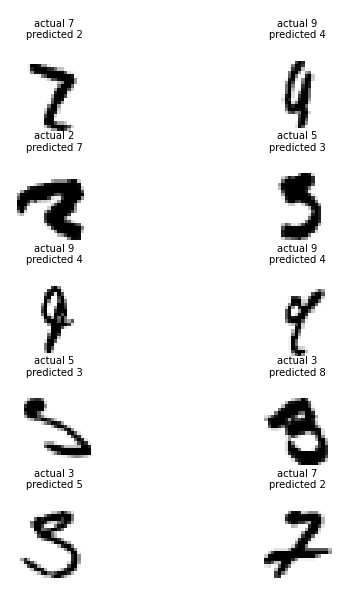

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp6 : BatchNorm with L1 and L2 regularization

In [ ]:
experiment_name='BatchNorm+L1+L2'
norm_type='BN'
l1_factor=0.001
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.8623735904693604 Batch_id=468 Accuracy=72.86: 100%|██████████| 469/469 [00:34<00:00, 13.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2064, Accuracy: 9581/10000 (95.81%)

Epoch 2:


Loss=0.6527384519577026 Batch_id=468 Accuracy=92.95: 100%|██████████| 469/469 [00:34<00:00, 13.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0839, Accuracy: 9749/10000 (97.49%)

Epoch 3:


Loss=0.4668824076652527 Batch_id=468 Accuracy=95.05: 100%|██████████| 469/469 [00:34<00:00, 13.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0564, Accuracy: 9826/10000 (98.26%)

Epoch 4:


Loss=0.4499419033527374 Batch_id=468 Accuracy=95.65: 100%|██████████| 469/469 [00:34<00:00, 13.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0650, Accuracy: 9810/10000 (98.10%)

Epoch 5:


Loss=0.4285954535007477 Batch_id=468 Accuracy=95.74: 100%|██████████| 469/469 [00:34<00:00, 13.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0592, Accuracy: 9815/10000 (98.15%)

Epoch 6:


Loss=0.5641263723373413 Batch_id=468 Accuracy=96.15: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0564, Accuracy: 9828/10000 (98.28%)

Epoch 7:


Loss=0.375826895236969 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:34<00:00, 13.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0622, Accuracy: 9810/10000 (98.10%)

Epoch 8:


Loss=0.4180678427219391 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0551, Accuracy: 9828/10000 (98.28%)

Epoch 9:


Loss=0.4873816967010498 Batch_id=468 Accuracy=96.32: 100%|██████████| 469/469 [00:34<00:00, 13.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0494, Accuracy: 9845/10000 (98.45%)

Epoch 10:


Loss=0.4697272777557373 Batch_id=468 Accuracy=96.41: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0606, Accuracy: 9804/10000 (98.04%)

Epoch 11:


Loss=0.41167503595352173 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:34<00:00, 13.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0396, Accuracy: 9880/10000 (98.80%)

Epoch 12:


Loss=0.4105202555656433 Batch_id=468 Accuracy=96.71: 100%|██████████| 469/469 [00:34<00:00, 13.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9887/10000 (98.87%)

Epoch 13:


Loss=0.32090824842453003 Batch_id=468 Accuracy=96.63: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0404, Accuracy: 9873/10000 (98.73%)

Epoch 14:


Loss=0.3270704448223114 Batch_id=468 Accuracy=96.89: 100%|██████████| 469/469 [00:34<00:00, 13.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0465, Accuracy: 9854/10000 (98.54%)

Epoch 15:


Loss=0.37613406777381897 Batch_id=468 Accuracy=96.98: 100%|██████████| 469/469 [00:34<00:00, 13.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9885/10000 (98.85%)

Epoch 16:


Loss=0.3322891891002655 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:34<00:00, 13.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9922/10000 (99.22%)

Epoch 17:


Loss=0.33891284465789795 Batch_id=468 Accuracy=97.27: 100%|██████████| 469/469 [00:34<00:00, 13.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9915/10000 (99.15%)

Epoch 18:


Loss=0.25196483731269836 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:34<00:00, 13.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9919/10000 (99.19%)

Epoch 19:


Loss=0.21498391032218933 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:34<00:00, 13.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9938/10000 (99.38%)

Epoch 20:


Loss=0.2781795263290405 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:34<00:00, 13.56it/s]



Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)



## Missclassified Images for Exp6

---



Total wrong predictions are 63


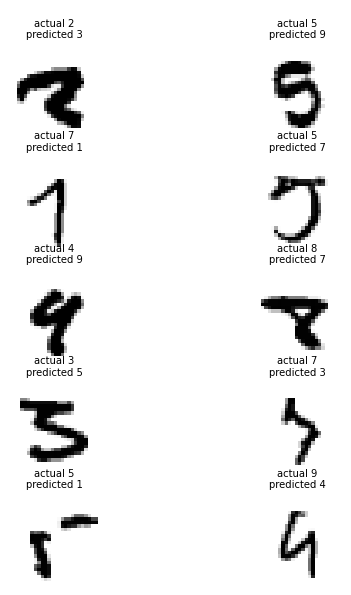

In [ ]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Plot Metrics for all Experiments

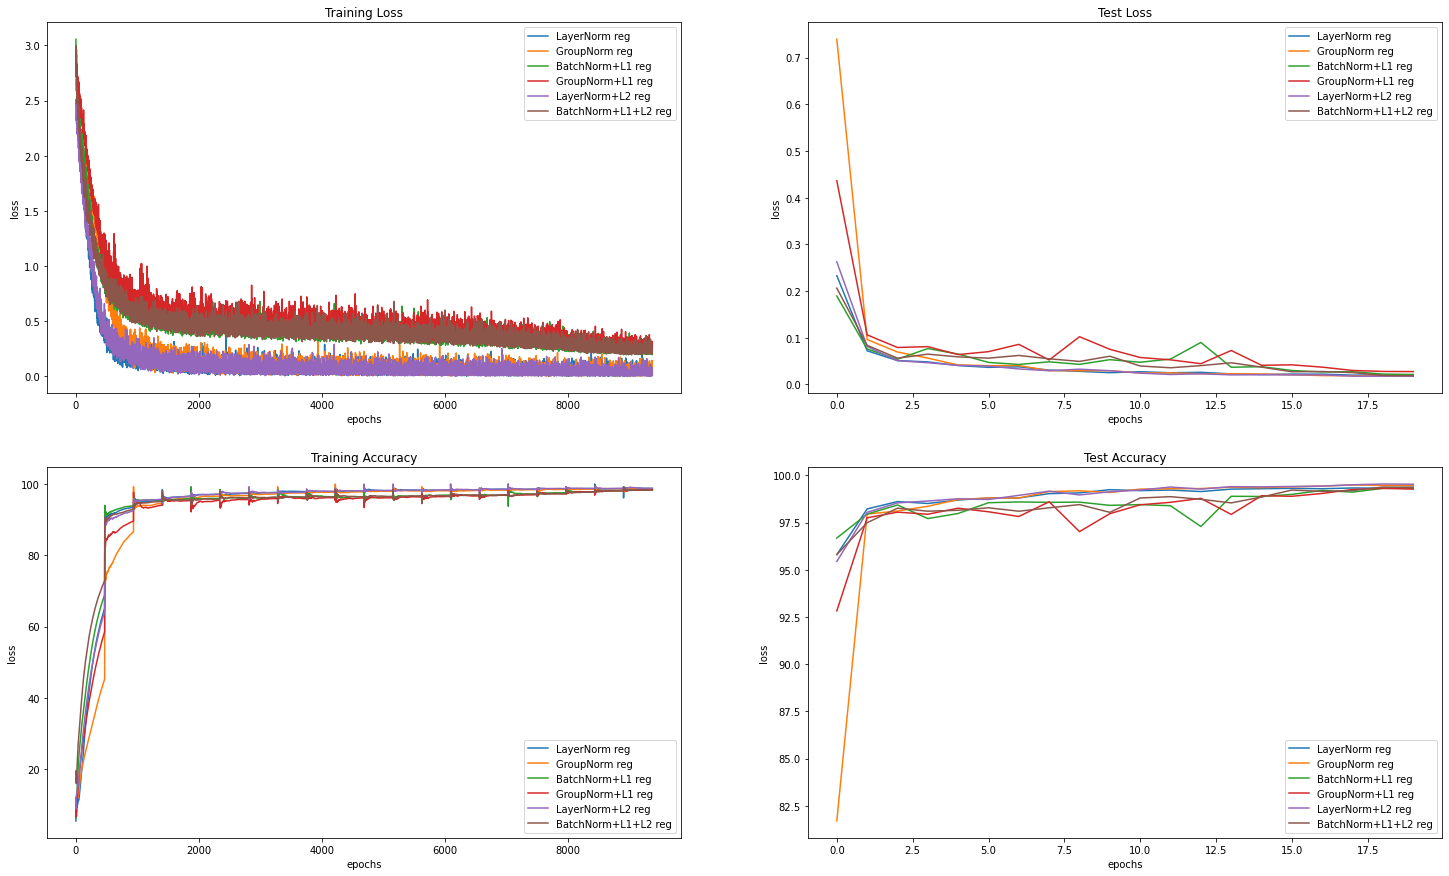

In [ ]:
plot_metrics.plot_metrics(exp_metrics)